In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

In [ ]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

In [ ]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

In [ ]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

In [ ]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

In [ ]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

In [ ]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

In [ ]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


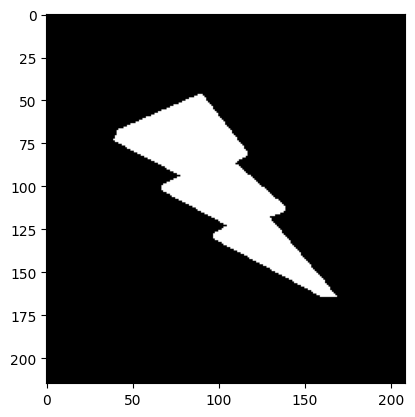

In [3]:
from tabnanny import check


lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
#check(1)

In [6]:
np.argwhere

<function argwhere at 0x0000023EE74B35B0>

In [5]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]], shape=(4880, 2))

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [73]:
# TODO
x = bolt[:, [0]]
y = bolt[:, [1]]
x_bar = np.mean(x)
y_bar = np.mean(y)
xy = x*y
x_y_bar = np.mean(xy)
x_bar_square = x_bar**2
x_square = x**2
x_square_bar = np.mean(x_square)
m = ((x_bar*y_bar)-x_y_bar)/(x_bar_square-x_square_bar)
b = y_bar - m * x_bar

## Question: Why would we want to convert x and y points from int values to floats?

In [ ]:
# TODO
# more accuaracy

In [76]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    
    x = points[:, [1]] #TODO
    y = points[:, [0]] #TODO
    x_mean = np.mean(x) #TODO
    y_mean = np.mean(y) #TODO

    xy_mean = np.mean(x*y) #TODO

    x_squared_mean = np.mean(x*x) #TODO

    m = (x_mean*y_mean-xy_mean)/(x_mean**2-x_squared_mean) #TODO
    
    b = y_mean - m * x_mean #TODO

    return (m,b)

print(calculate_regression(bolt))

(np.float64(0.8686624665586018), np.float64(12.298228714785196))


The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [ ]:
def find_inliers(m, b, shape):
    height, width = shape
    x1 = 0
    y1 = int(m*x1 + b)
    x2 = width - 1
    y2 = int(m*x2 + b)
    y1 = np.clip(y1, 0, height - 1)
    y2 = np.clip(y2, 0, height - 1)
    return x1,y1,x2,y2

(146, 125)


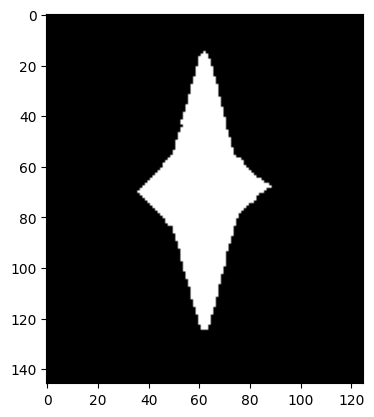

In [77]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [79]:
m,b = calculate_regression(np.argwhere(star))
_ = find_inliers(m,b, star.shape)
print(m,b,_)

-0.033897508301873575 71.71704249655464 (0, np.int64(71), 124, np.int64(67))


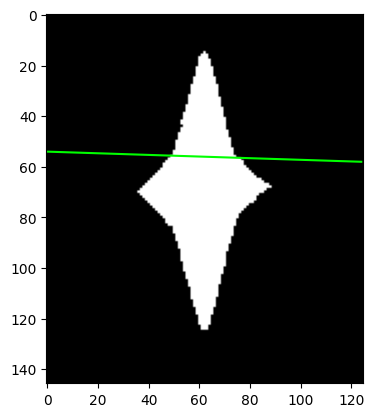

In [80]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below
width, height = star.shape

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray')
regression = Line2D([_[0],_[2]],[height-_[1],height-_[3]], color='lime')
ax.add_line(regression)

In [ ]:
Line2D?

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

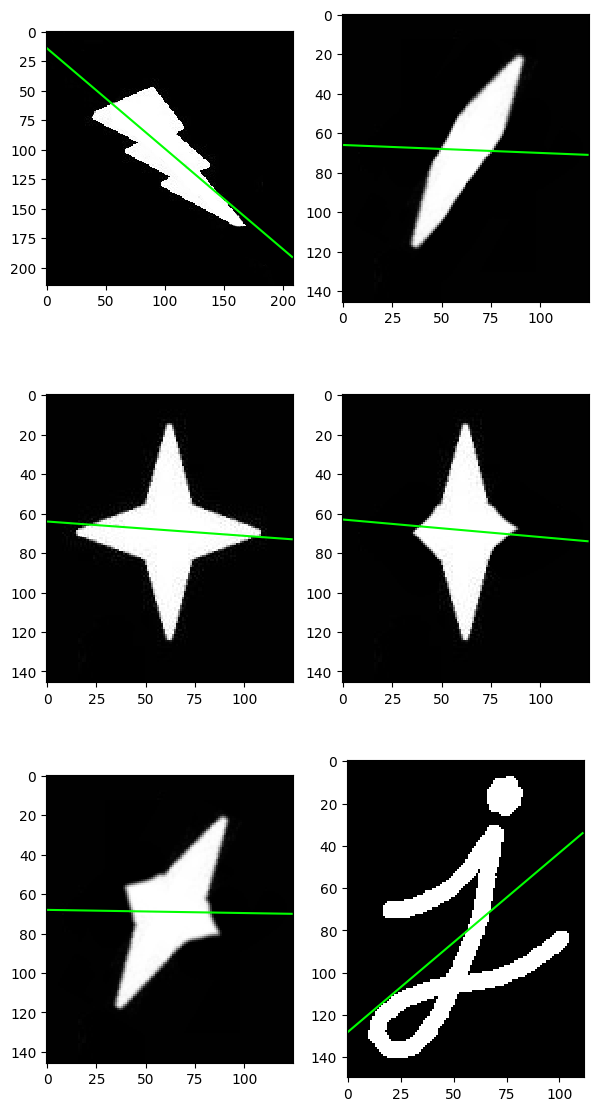

In [69]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none')
    m,b = calculate_regression(np.argwhere(i))
    _ = find_inliers(m,b, i.shape)
    height, width = i.shape
    regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
    a.add_line(regression)
fig.set_size_inches(7,14)

## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.

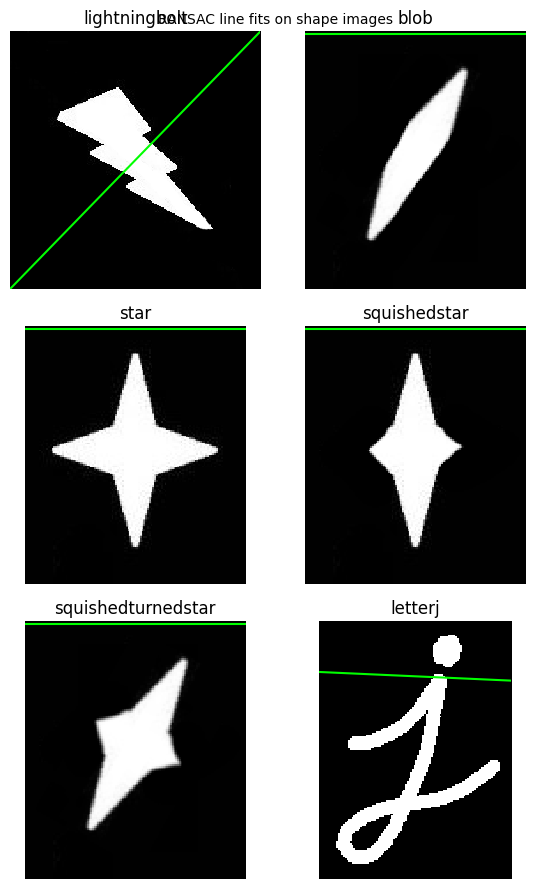

In [104]:
from __future__ import annotations
from copy import copy
from dataclasses import dataclass
from pathlib import Path
from typing import Iterable, List, Tuple
import numpy as np
from numpy.random import default_rng
import cv2
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rng = default_rng()

class RANSAC:
    def __init__(self, n=10, k=1000, t=0.05, d=10, model=None, loss=None, metric=None):
        self.n = n
        self.k = k
        self.t = t
        self.d = d
        self.model = model
        self.loss = loss
        self.metric = metric
        self.best_fit = None
        self.best_error = np.inf

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        n_samples = X.shape[0]
        if n_samples < self.n:
            raise ValueError(f"Need ≥{self.n} points; got {n_samples}.")
        fallback_model = None
        fallback_error = np.inf
        for _ in range(self.k):
            ids = rng.permutation(n_samples)
            maybe_inliers = ids[: self.n]
            maybe_model = copy(self.model).fit(X[maybe_inliers], y[maybe_inliers])
            residuals = self.loss(y[ids][self.n :], maybe_model.predict(X[ids][self.n :]))
            thresholded = residuals < self.t
            inlier_ids = ids[self.n :][np.flatnonzero(thresholded).flatten()]
            if inlier_ids.size + self.n > 0:
                pts = np.hstack([maybe_inliers, inlier_ids])
                tmp_model = copy(self.model).fit(X[pts], y[pts])
                tmp_err = self.metric(y[pts], tmp_model.predict(X[pts]))
                if tmp_err < fallback_error:
                    fallback_error = tmp_err
                    fallback_model = tmp_model
            if inlier_ids.size >= self.d:
                inlier_points = np.hstack([maybe_inliers, inlier_ids])
                better_model = copy(self.model).fit(X[inlier_points], y[inlier_points])
                this_error = self.metric(y[inlier_points], better_model.predict(X[inlier_points]))
                if this_error < self.best_error:
                    self.best_error = this_error
                    self.best_fit = better_model
        if self.best_fit is None and fallback_model is not None:
            self.best_fit = fallback_model
            self.best_error = fallback_error
        return self

    def predict(self, X):
        if self.best_fit is None:
            raise RuntimeError("RANSAC.fit() never found a valid model.")
        return self.best_fit.predict(X)


def square_error_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2


def mean_square_error(y_true, y_pred):
    return np.sum(square_error_loss(y_true, y_pred)) / y_true.shape[0]


class LinearRegressor:
    def __init__(self):
        self.params = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        r, _ = X.shape
        Xd = np.hstack([np.ones((r, 1)), X])
        beta = np.linalg.pinv(Xd.T @ Xd) @ Xd.T @ y
        self.params = np.ravel(beta)
        return self

    def predict(self, X: np.ndarray):
        if self.params is None:
            raise RuntimeError("LinearRegressor not fit.")
        r, _ = X.shape
        Xd = np.hstack([np.ones((r, 1)), X])
        return Xd @ self.params.reshape(-1, 1)

    @property
    def intercept_(self) -> float:
        return float(self.params[0])

    @property
    def slope_(self) -> float:
        return float(self.params[1])
        return float(self.params[1])


def load_gray(path: Path) -> np.ndarray:
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(path)
    return img


def image_to_points(img: np.ndarray, threshold: int = 0) -> Tuple[np.ndarray, np.ndarray]:
    pts = np.argwhere(img > threshold)
    if pts.size == 0:
        raise ValueError("No foreground pixels found (all <= threshold).")
    y = pts[:, 0].astype(float).reshape(-1, 1)
    X = pts[:, 1].astype(float).reshape(-1, 1)
    return X, y


def vertical_variance_small(X: np.ndarray, tol: float = 1e-6) -> bool:
    return np.var(X) < tol


@dataclass
class RansacResult:
    m: float
    b: float
    inlier_mask: np.ndarray
    X: np.ndarray
    y: np.ndarray


def fit_ransac_image(img: np.ndarray, *, t_pixels: float = 3.0, d_fraction: float = 0.25, k: int = 1000, threshold: int = 0) -> RansacResult:
    X, y = image_to_points(img, threshold=threshold)
    n_pts = X.shape[0]
    flipped = False
    if vertical_variance_small(X):
        flipped = True
        X, y = y, X
    n_min = 2
    d_min = max(int(d_fraction * n_pts), n_min)
    ransac = RANSAC(
        n=n_min,
        k=k,
        t=(t_pixels ** 2),
        d=d_min,
        model=LinearRegressor(),
        loss=square_error_loss,
        metric=mean_square_error,
    ).fit(X, y)
    if ransac.best_fit is None:
        mdl = LinearRegressor().fit(X, y)
    else:
        mdl = ransac.best_fit
    b = mdl.intercept_
    m = mdl.slope_
    residuals = square_error_loss(y, mdl.predict(X))
    inlier_mask = (residuals < (t_pixels ** 2)).ravel()
    if flipped:
        if abs(m) < 1e-12:
            m_img = np.inf
            b_img = np.nan
        else:
            m_img = 1.0 / m
            b_img = -b / m
        Ximg, Yimg = y, X
        return RansacResult(m=m_img, b=b_img, inlier_mask=inlier_mask, X=Ximg, y=Yimg)
    return RansacResult(m=m, b=b, inlier_mask=inlier_mask, X=X, y=y)


def line_endpoints_from_mb(m: float, b: float, width: int, height: int) -> Tuple[int, int, int, int]:
    if np.isinf(m):
        x = width // 2
        return x, 0, x, height - 1
    x1 = 0
    y1 = int(round(m * x1 + b))
    x2 = width - 1
    y2 = int(round(m * x2 + b))
    y1 = int(np.clip(y1, 0, height - 1))
    y2 = int(np.clip(y2, 0, height - 1))
    return x1, y1, x2, y2


def plot_ransac_on_axes(ax, img: np.ndarray, res: RansacResult, show_inliers=False):
    ax.imshow(img, cmap="gray", interpolation="none")
    h, w = img.shape
    x1, y1, x2, y2 = line_endpoints_from_mb(res.m, res.b, w, h)
    ax.add_line(Line2D([x1, x2], [y1, y2], color="lime", linewidth=1.5))
    if show_inliers:
        X = res.X.ravel()
        Y = res.y.ravel()
        ax.scatter(X[res.inlier_mask], Y[res.inlier_mask], s=3, c="cyan")
        ax.scatter(X[~res.inlier_mask], Y[~res.inlier_mask], s=3, c="red", alpha=0.5)
    ax.set_axis_off()


def run_all(image_paths: Iterable[Path], *, t_pixels=3.0, d_fraction=0.25, k=1000, show_inliers=False):
    imgs = []
    results: List[RansacResult] = []
    for p in image_paths:
        img = load_gray(p)
        res = fit_ransac_image(img, t_pixels=t_pixels, d_fraction=d_fraction, k=k)
        imgs.append(img)
        results.append(res)
    n = len(imgs)
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3 * nrows))
    axes = np.atleast_1d(axes).ravel()
    for ax, img, res, p in zip(axes, imgs, results, image_paths):
        plot_ransac_on_axes(ax, img, res, show_inliers=show_inliers)
        ax.set_title(p.stem)
    for ax in axes[n:]:
        ax.set_visible(False)
    fig.tight_layout()
    return imgs, results, fig


if __name__ == "__main__":
    regressor = RANSAC(model=LinearRegressor(), loss=square_error_loss, metric=mean_square_error)
    line = np.linspace(-1, 1, num=100).reshape(-1, 1)
    shape_dir = Path("shapes")
    image_names = [
        "lightningbolt.png",
        "blob.png",
        "star.png",
        "squishedstar.png",
        "squishedturnedstar.png",
        "letterj.png",
    ]
    paths = [shape_dir / n for n in image_names]
    try:
        _, _, fig2 = run_all(paths, t_pixels=3.0, d_fraction=0.25, k=100_000, show_inliers=False)
        fig2.suptitle("RANSAC line fits on shape images", fontsize=10)
        plt.show()
    except FileNotFoundError as e:
        print(f"Skipping image demo; missing: {e}")

   lightningbolt: slope=1.281, intercept=-29.228
   lightningbolt: slope=1.281, intercept=-29.228
            blob: slope=1.281, intercept=-29.228
   lightningbolt: slope=1.281, intercept=-29.228
            blob: slope=1.281, intercept=-29.228
            star: slope=1.281, intercept=-29.228
   lightningbolt: slope=1.281, intercept=-29.228
            blob: slope=1.281, intercept=-29.228
            star: slope=1.281, intercept=-29.228
    squishedstar: slope=1.281, intercept=-29.228
   lightningbolt: slope=1.281, intercept=-29.228
            blob: slope=1.281, intercept=-29.228
            star: slope=1.281, intercept=-29.228
    squishedstar: slope=1.281, intercept=-29.228
squishedturnedstar: slope=1.281, intercept=-29.228


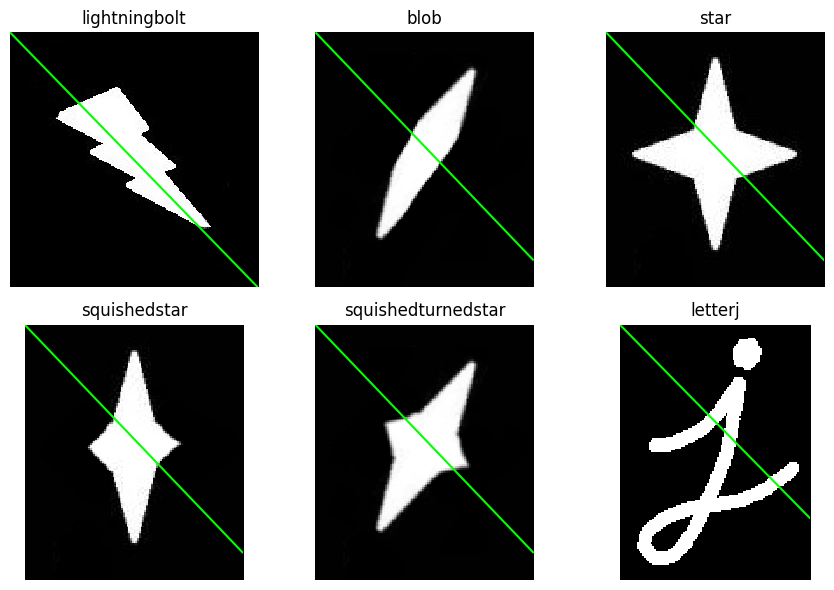

In [110]:
from copy import copy
import numpy as np
from numpy.random import default_rng
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.lines import Line2D

rng = default_rng()

class RANSAC:
    def __init__(self, n=10, k=100, t=0.05, d=10, model=None, loss=None, metric=None):
        self.n = n
        self.k = k
        self.t = t
        self.d = d
        self.model = model
        self.loss = loss
        self.metric = metric
        self.best_fit = None
        self.best_error = np.inf

    def fit(self, X, y):
        for _ in range(self.k):
            ids = rng.permutation(X.shape[0])
            maybe_inliers = ids[: self.n]
            maybe_model = copy(self.model).fit(X[maybe_inliers], y[maybe_inliers])
            errs = self.loss(y[ids][self.n :], maybe_model.predict(X[ids][self.n :]))
            thresholded = errs < self.t
            inlier_ids = ids[self.n :][np.flatnonzero(thresholded).flatten()]
            if inlier_ids.size >= self.d:
                inlier_points = np.hstack([maybe_inliers, inlier_ids])
                better_model = copy(self.model).fit(X[inlier_points], y[inlier_points])
                this_error = self.metric(y[inlier_points], better_model.predict(X[inlier_points]))
                if this_error < self.best_error:
                    self.best_error = this_error
                    self.best_fit = better_model
        return self

    def predict(self, X):
        return self.best_fit.predict(X)


def square_error_loss(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    return (y_true - y_pred) ** 2

def mean_square_error(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    return np.mean((y_true - y_pred) ** 2)

class LinearRegressor:
    def __init__(self):
        self.params = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        r, _ = X.shape
        Xd = np.hstack([np.ones((r, 1)), X])
        XtX = Xd.T @ Xd
        try:
            beta = np.linalg.inv(XtX) @ Xd.T @ y
        except np.linalg.LinAlgError:
            beta = np.linalg.pinv(XtX) @ Xd.T @ y
        self.params = np.ravel(beta)
        return self

    def predict(self, X: np.ndarray):
        r, _ = X.shape
        Xd = np.hstack([np.ones((r, 1)), X])
        return Xd @ self.params

    @property
    def intercept_(self):
        return float(self.params[0])

    @property
    def slope_(self):
        return float(self.params[1])


def _extract_points(img, thresh=0):
    pts = np.argwhere(img > thresh)
    if pts.size == 0:
        return None, None
    y = pts[:, 0].astype(float)
    x = pts[:, 1].astype(float)
    return x.reshape(-1, 1), y.reshape(-1, 1)


def _fit_line_xy(x, y, t_pixels=3.0, d_frac=0.25, k=1000, min_pts=2):
    if x is None or x.shape[0] < min_pts:
        return None
    n_total = x.shape[0]
    d = max(min_pts, int(np.ceil(d_frac * n_total)))
    t = (t_pixels ** 2)
    r = RANSAC(n=min_pts, k=k, t=t, d=d, model=LinearRegressor(), loss=square_error_loss, metric=mean_square_error)
    r.fit(x, y)
    if r.best_fit is None:
        lr = LinearRegressor().fit(x, y)
        return lr
    return r.best_fit


def fit_line_image(img, t_pixels=3.0, d_frac=0.25, k=1000, thresh=0):
    x, y = _extract_points(img, thresh=thresh)
    if x is None:
        return None, None
    vx = np.var(x)
    vy = np.var(y)
    if vx >= vy:
        mdl = _fit_line_xy(x, y, t_pixels=t_pixels, d_frac=d_frac, k=k)
        m = mdl.slope_
        b = mdl.intercept_
    else:
        mdl = _fit_line_xy(y, x, t_pixels=t_pixels, d_frac=d_frac, k=k)
        a = mdl.slope_
        c = mdl.intercept_
        if a == 0:
            m = np.inf
            b = np.nan
        else:
            m = 1.0 / a
            b = -c / a
    return m, b


def line_endpoints_for_image(m, b, shape):
    h, w = shape
    if np.isinf(m):
        x = int(np.clip(b, 0, w - 1))
        return 0, x, h - 1, x
    x0 = 0
    y0 = m * x0 + b
    x1 = w - 1
    y1 = m * x1 + b
    y0 = np.clip(y0, 0, h - 1)
    y1 = np.clip(y1, 0, h - 1)
    return y0, x0, y1, x1


def show_images_with_lines(imgs, names=None, params=None, cmap="gray"):
    n = len(imgs)
    cols = 3 if n > 3 else n
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = np.atleast_1d(axes).ravel()
    for i, img in enumerate(imgs):
        ax = axes[i]
        ax.imshow(img, cmap=cmap, interpolation="none")
        if params is not None:
            m, b = params[i]
            if m is not None:
                y0, x0, y1, x1 = line_endpoints_for_image(m, b, img.shape)
                ln = Line2D([x0, x1], [y0, y1], color="lime")
                ax.add_line(ln)
        if names:
            ax.set_title(names[i])
        ax.axis("off")
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    fig.tight_layout()
    return fig


if __name__ == "__main__":
    regressor = RANSAC(model=LinearRegressor(), loss=square_error_loss, metric=mean_square_error)

    shape_dir = Path("shapes")
    names = ["lightningbolt","blob","star","squishedstar","squishedturnedstar","letterj"]
    imgs = []
    params = []
    for n in names:
        p = shape_dir / f"{n}.png"
        im = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
        imgs.append(im)
        m,b = fit_line_image(im, t_pixels=3.0, d_frac=0.25, k=1000)
        for n,(m,b) in zip(names, params):
            print(f"{n:>16s}: slope={m:.3f}, intercept={b:.3f}")

        params.append((m,b))
    show_images_with_lines(imgs, names, params)
    plt.show()
